Student Details

Name: ***Chelliah Kanthanathan***

ID: ***18263003***

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("./dataset_1.csv")
df.head(5)

,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


In [3]:
df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [4]:
X = df[['0','1']]
y = df['2']
print (X.shape)
print (y.shape)

(10001, 2)
(10001,)


In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)

(8000, 2)


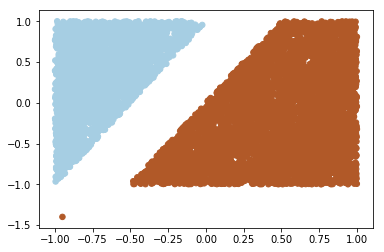

In [6]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

Sample code to plot SVM margin, 'gutters' and support vectors

In [7]:
def plot_margin_task4(clf,c_value):
    plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)    

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='b', edgecolors='y')
    plt.title('SVM margin for C-Value: ' + str(c_value))
    plt.show()

In [24]:
def plot_margin_task5(clf,XXX_train, yyy_train):
    plt.scatter(XXX_train.values[:, 0], XXX_train.values[:, 1], c=yyy_train, s=30, cmap=plt.cm.Paired) 
    
    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='b', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='b', edgecolors='y')
    plt.title('SVM margin for best parameters')
    plt.show()

### Task 4
Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

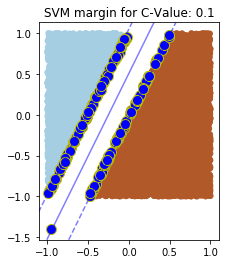

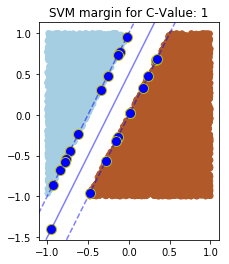

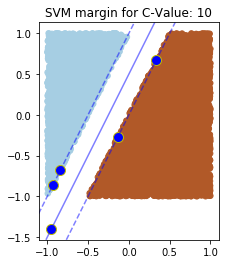

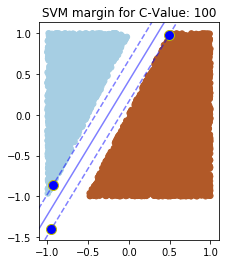

In [9]:
c_value = [0.1, 1, 10, 100]
for c_index in range(len(c_value)):
    svc = svm.SVC(kernel='linear', gamma="auto", C=c_value[c_index])
    svc.fit(X_train, y_train)
    plot_margin_task4(svc,c_value[c_index])

##### Conclusion: The large value of C resulted in hard margin and narrow margin, moreover large value of C considered only some points close to line of separation. But the small value of C resulted in soft margin and wider margin, It also included all the data points and calculated margins using all the data in the area.

### Task 5
Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

In [26]:
def explore_hyper_parameters(XX_train,yy_train):
    # using gridsearchCV to choose best parameters
    svc_parameters = [{'kernel': ['rbf'], 'gamma': ['auto', 'scale'],'C': [0.1, 10, 100, 1000]},
                      #{'kernel': ['poly'], 'degree': [2, 3], 'gamma': ['auto', 'scale'],'C': [0.1, 10, 100, 1000]},
                      {'kernel': ['linear'], 'gamma': ['auto', 'scale'], 'C': [0.1, 10, 100, 1000]}]

    clf = GridSearchCV(SVC(), svc_parameters, cv=5)#,scoring='precision')
    clf.fit(XX_train, yy_train)
    print("Best hyper-parameters are: ")
    print(clf.best_params_)
    plot_margin_task5(clf,XX_train, yy_train)

    # Scores for different hyper-parameters
    print ("Scores for different hyper-parameters")
    gridcv_test_score = clf.cv_results_['mean_test_score']
    for score, best_params in zip(gridcv_test_score, clf.cv_results_['params']):
        print("%f for %r"% (score, best_params))

Best hyper-parameters are: 
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


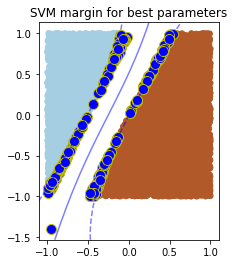

Scores for different hyper-parameters
0.999875 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.999875 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.999875 for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.999875 for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.999875 for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.999875 for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.999875 for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
0.999875 for {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
0.999875 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.999875 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.999875 for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.999875 for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.999875 for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.999875 for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.999875 for {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'}
0.999875 for {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
# explore dataset_1
explore_hyper_parameters(X_train,y_train)

(10000, 2)
(10000,)
(8000, 2)
Best hyper-parameters are: 
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


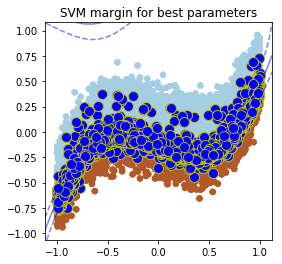

Scores for different hyper-parameters
0.821375 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.854625 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.867750 for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.866125 for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.865875 for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.866250 for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.865500 for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
0.866625 for {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
0.778500 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.778500 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.778125 for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.778125 for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.778125 for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.778125 for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.778125 for {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'}
0.778125 for {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


In [28]:
# explore dataset_2
df2 = pd.read_csv("./dataset_2.csv")
df2.head(5)

X2 = df2[['0','1']]
y2 = df2['2']
print (X2.shape)
print (y2.shape)

# split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print (X2_train.shape)

plt.scatter(X2_train.values[:, 0], X2_train.values[:, 1], c=y2_train, s=30, cmap=plt.cm.Paired)

explore_hyper_parameters(X2_train,y2_train)

(10000, 2)
(10000,)
(8000, 2)
Best hyper-parameters are: 
{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


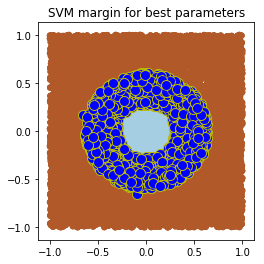

Scores for different hyper-parameters
0.987250 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
0.987750 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.986875 for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.987250 for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.986625 for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.986750 for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.986750 for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
0.986875 for {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
0.882250 for {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
0.882250 for {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.882250 for {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
0.882250 for {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.882250 for {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}
0.882250 for {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
0.882250 for {'C': 1000, 'gamma': 'auto', 'kernel': 'linear'}
0.882250 for {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}


In [29]:
# explore dataset_3
df3 = pd.read_csv("./dataset_3.csv")
df3.head(5)

X3 = df3[['0','1']]
y3 = df3['2']
print (X3.shape)
print (y3.shape)

# split data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

print (X3_train.shape)

plt.scatter(X3_train.values[:, 0], X3_train.values[:, 1], c=y3_train, s=30, cmap=plt.cm.Paired)

explore_hyper_parameters(X3_train,y3_train)